# SNPs: Sensitivity analysis

In [1]:
from SALib.sample import saltelli, fast_sampler
import pandas as pd
from Sensitivity import Sensitivity

model_path = "../models/BMI-SNP/"
output_path = "../output/data/"
plots_path = "../output/plots/"

In [2]:
# parameter dictionary
problem = {
    'num_vars': 3,
    'names': ['random-mating', 'genetic-variance', 'fertility-differential'],
    'bounds': [[0, 1.0],
               [0, 0.50],
               [0, 0.30]]
}

# EFast

In [3]:
sample_parameters = False
if (sample_parameters):
    param_values = fast_sampler.sample(problem, 2000)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-efast.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-efast.csv")
t.shape

(6000, 3)

In [4]:
# read data
df = pd.read_csv(output_path + "results-snp-efast.csv", sep = ";")
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-efast.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]

<ipython-input-4-28a1c4a50fc9>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)


In [5]:
params.head()

iteration  replicate  init_pop fertility_type mating_type  \
0          1          1      8000       additive     uniform   
1         10          1      8000       additive     uniform   
2        100          1      8000       additive     uniform   
3       1000          1      8000       additive     uniform   
4       1001          1      8000       additive     uniform   

   p_genetic_variance  p_vertical_trans_variance  p_leakage  p_random_mating  \
0            0.306359                        0.0        0.1         0.612718   
1            0.310859                        0.0        0.1         0.853718   
2            0.355859                        0.0        0.1         0.736282   
3            0.194141                        0.0        0.1         0.636282   
4            0.193641                        0.0        0.1         0.387282   

   p_fertility_factor  
0            0.183815  
1            0.267515  
2            0.095485  
3            0.125485  
4            0.116185

## Proportion obese

                              S1        ST   S1_conf   ST_conf
random-mating           0.133273  0.293394  0.003830  0.023521
genetic-variance        0.416009  0.645982  0.003334  0.019187
fertility-differential  0.187587  0.351131  0.004012  0.016282


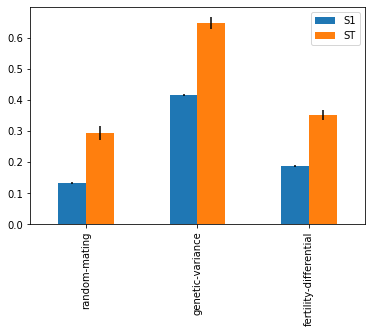

In [6]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'fertility', 'z':'genes'})

## Average BMI

                              S1        ST   S1_conf   ST_conf
random-mating           0.114708  0.225840  0.003992  0.017183
genetic-variance        0.443266  0.620443  0.003809  0.018986
fertility-differential  0.237097  0.374472  0.004165  0.017181


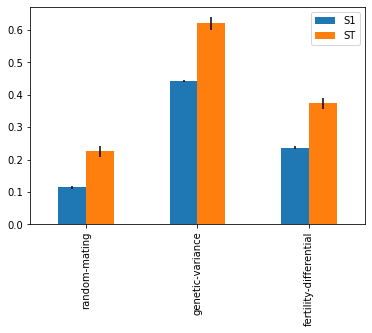

In [7]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'average bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## BMI SD

                              S1        ST   S1_conf   ST_conf
random-mating           0.170901  0.581664  0.004186  0.019630
genetic-variance        0.271612  0.693212  0.004235  0.016138
fertility-differential  0.068500  0.380502  0.003866  0.016770


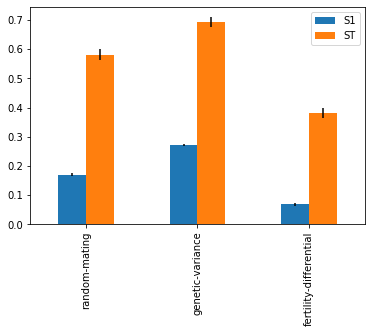

In [8]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('efast')
ef.plot(save=True, filepath= plots_path + 'snp-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

# Sobol

In [9]:
sample_parameters = True
if (sample_parameters):
    param_values = saltelli.sample(problem, 2**11)
    t = pd.DataFrame(param_values)
    t.columns = ['random-mating', 'genetic-variance', 'fertility-differential']
    t.to_csv(model_path + "data/param-snp-sobol.csv", index=False)
else:
    t = pd.read_csv(model_path + "data/param-snp-sobol.csv")
len(t)

16384

In [15]:
# read data
df = pd.read_csv(output_path + "results-snp-sobol.csv", sep = ";")
print(df.shape)
cols = df.bmi_category_prop.str.replace(r'\[|\]', '').str.split(",", n=4, expand=True)
colnames = ['g'+str(i+1) for i in range(4)]
cols.columns = colnames
cols = cols[colnames].apply(pd.to_numeric)
df = pd.concat([df, cols], axis=1, ignore_index=False)
params = pd.read_csv(output_path + "param-snp-sobol.csv", sep = ";")
df = df.merge(params, on = ["iteration", "replicate"])
df["iteration"] = pd.to_numeric(df["iteration"])
df = df.sort_values(by=['iteration'])
df = df.loc[df["iteration"] <= len(t),:]

# select parameters
vars = ['p_fertility_factor', 'p_random_mating', 'p_genetic_variance']
X = df.loc[:,vars]


(16384, 11)


<ipython-input-15-3290f5cf4f77>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



In [11]:
params.head()

iteration  replicate  init_pop fertility_type  p_genetic_variance  \
0          1          1      8000       additive            0.156860   
1         10          1      8000       additive            0.406860   
2        100          1      8000       additive            0.188110   
3       1000          1      8000       additive            0.210571   
4      10000          1      8000       additive            0.114136   

   p_random_mating  p_fertility_factor  
0         0.000732            0.220239  
1         0.246826            0.070239  
2         0.313232            0.239429  
3         0.864014            0.199585  
4         0.158447            0.252466

## Proportion obese

                              ST   ST_conf
random-mating           0.304700  0.038017
genetic-variance        0.657539  0.059491
fertility-differential  0.341643  0.038821
                              S1   S1_conf
random-mating           0.144428  0.031460
genetic-variance        0.428707  0.051129
fertility-differential  0.188458  0.034900
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.105429  0.073856
(random-mating, fertility-differential)     0.027101  0.058241
(genetic-variance, fertility-differential)  0.088145  0.083232


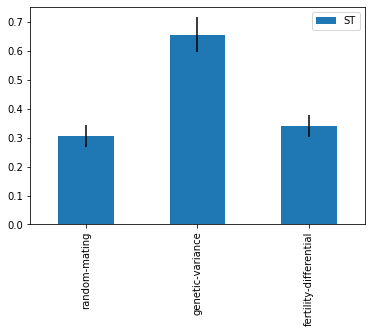

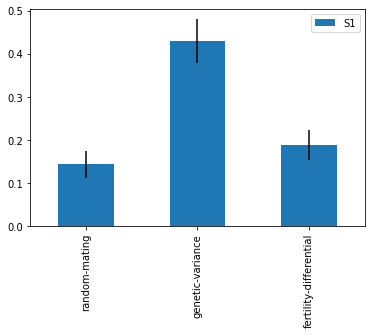

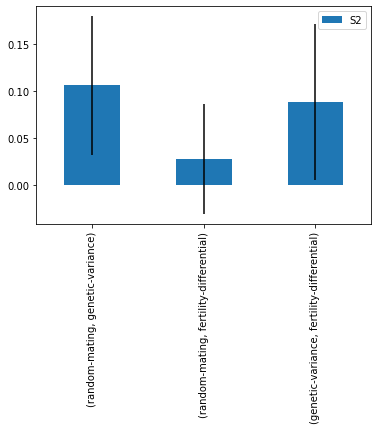

In [12]:
ef = Sensitivity(problem, df['g4'], X)
ef.score('sobol')
ef.plot(save=True, filepath= plots_path + 'snp-sobol-prop-obese.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'obese', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## Average BMI

                              ST   ST_conf
random-mating           0.237658  0.024737
genetic-variance        0.634381  0.048726
fertility-differential  0.369272  0.035261
                              S1   S1_conf
random-mating           0.126786  0.026407
genetic-variance        0.457837  0.043225
fertility-differential  0.237061  0.034219
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.069206  0.054887
(random-mating, fertility-differential)     0.020889  0.047194
(genetic-variance, fertility-differential)  0.077417  0.072299


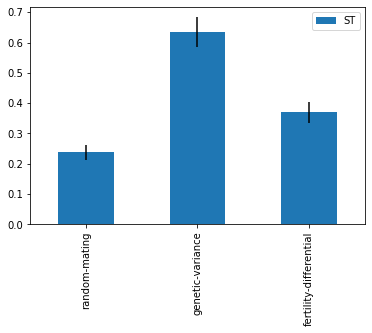

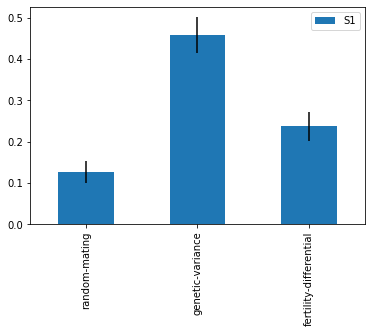

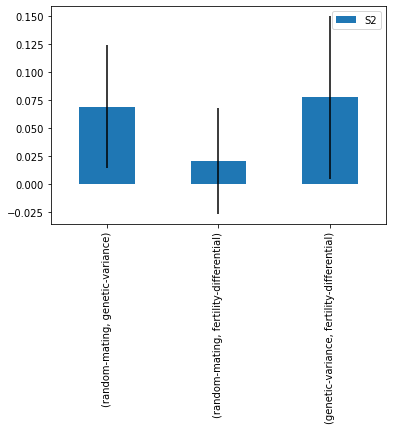

In [13]:
ef = Sensitivity(problem, df['average_bmi'], X)
ef.score('sobol')
ef.plot(save=True, filepath= plots_path + 'snp-sobol-average-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'avearge bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})

## BMI SD

                              ST   ST_conf
random-mating           0.586884  0.086333
genetic-variance        0.712250  0.075178
fertility-differential  0.391129  0.062802
                              S1   S1_conf
random-mating           0.196759  0.057046
genetic-variance        0.309512  0.058924
fertility-differential  0.050327  0.036421
                                                  S2   S2_conf
(random-mating, genetic-variance)           0.190580  0.136071
(random-mating, fertility-differential)     0.081399  0.129184
(genetic-variance, fertility-differential)  0.122397  0.118909


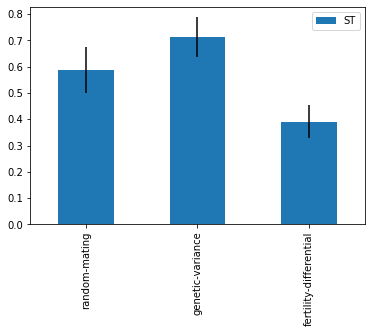

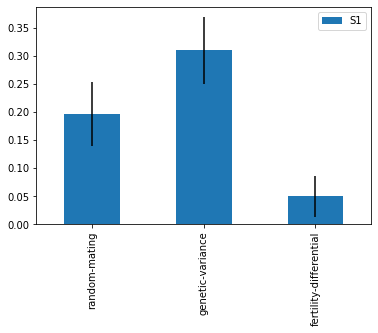

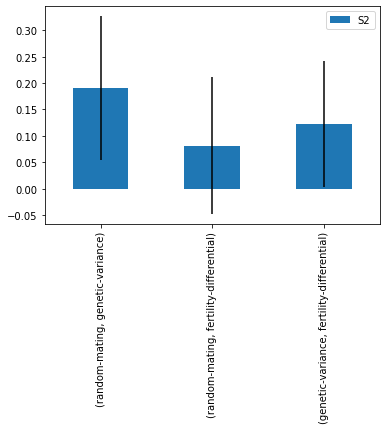

In [14]:
ef = Sensitivity(problem, df['sd_bmi'], X)
ef.score('sobol')
ef.plot(save=True, filepath= plots_path + 'snp-efast-sd-bmi.pdf',
    move=True, moving_path= '../manuscript/plots/')
ef.plot3D(labels={'outcome':'sd bmi', 'y':'random mating', 'x':'vertical transmission', 'z':'genes'})